<a href="https://colab.research.google.com/github/crazygovind/AI-Foundation-Whitehat-Jr/blob/master/50_Project_SIMPLE_LINEAR_REGRESSION_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

1. Simple Linear Regression I 
2. Simple Linear Regression II



---

### Problem Statement 

As an owner of a startup, you wish to forecast the sales of your product to plan how much money should be spent on advertisements. This is because the sale of a product is usually proportional to the money spent on advertisements.

Predict the impact of TV advertising on your product sales by performing simple linear regression analysis. 





---

### List of Activities

**Activity 1:** Analysing the dataset

  
**Activity 2:**  Train-Test split

**Activity 3:**  Model training

**Activity 4:** Plotting the best fit line

**Activity 5:** Model prediction





---


#### Activity 1:  Analysing the Dataset

Create a Pandas DataFrame for **Advertising-Sales** dataset using the below link. This dataset contains information about the money spent on the TV, radio and newspaper advertisement (in thousand dollars) and their generated sales (in thousand units). The dataset consists of examples that are divided by 1000.

  **Source:** https://www.kaggle.com/ishaanv/ISLR-Auto

  **Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/advertising.csv

Also, print the first five rows of the dataset. Check for null values and treat them accordingly.




In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df=pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/advertising.csv')
# Print first five rows using head() function
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [2]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

---

#### Activity 2: Train-Test Split

For simple linear regression, consider only the effect of **TV ads** on sales. Thus, `TV` is the feature variable and `Sales` is the target variable. 

Split the dataset into training set and test set such that the training set contains 67% of the instances and the remaining instances will become the test set.




In [4]:
# Split the DataFrame into the training and test sets.
from sklearn.model_selection import train_test_split
X=df['TV']
y=df['Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

---

#### Activity 3: Model Training

Train the simple regression model using the **training data** to obtain the best fit line $y = mx + c$. For this, perform the following tasks:

1. Create following two functions:

 - A function `errors_product()` that calculates the errors for the feature and target variables i.e. $(x_i - \bar{x})(y_i - \bar{y})$

 - A function `squared_errors()` that calculates the squared errors for the feature variable only i.e. $(x_i - \bar{x})^2$

2. Calculate the **slope** and **intercept** values for the best fit line by applying the following formulae:
 $$slope\Rightarrow m = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}=\frac{ errors\_product().sum()}{squared\_errors().sum()}$$

 $$intercept \Rightarrow c = \bar{y} - m \bar{x}$$



In [5]:
# Create the 'errors_product()' and 'squared_errors()' function.
def errors_product():
  prod=(X_train-X_train.mean())*(y_train-y_train.mean())
  return prod
def squared_errors():
  sq_errors=(X_train-X_train.mean())**2
  return sq_errors

In [6]:
# Calculate the slope and intercept values for the best fit line.
slope=errors_product().sum()/squared_errors().sum()
intercept=y_train.mean()-slope*X_train.mean()
print(slope,intercept)

0.054834883795279406 7.20655454817325


**Q:** What is the equation obtained for the best fit line of this model?

**A:** 

---

#### Activity 4: Plotting the Best Fit Line

After obtaining the slope and intercept values for the best fit line, plot this line along with the scatter plot to see how well it fits the points.


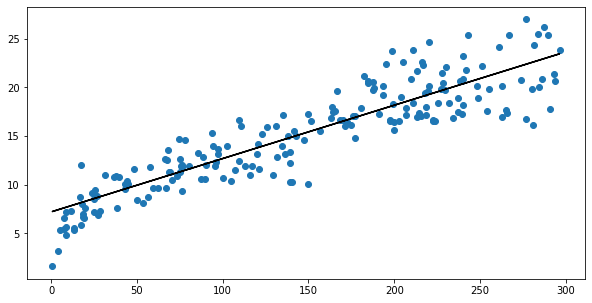

In [9]:
#  Plot the regression line in the scatter plot between Sales and TV advertisment values.
plt.figure(figsize=(10,5))
plt.scatter(df['TV'],df['Sales'])
plt.plot(df['TV'],slope*df['TV']+intercept,color='black')
plt.show()

---

#### Activity 5: Model Prediction

For the TV advertising of $50,000, what is prediction for Sales? In order to predict this value, perform the following task:

- Based on the regression line, create a function `sales_predicted()` which takes a budget to be used for TV advertising as an input and returns the corresponding units of Sales.
- Call the function `sales_predicted()` and pass the amount spent on TV advertising. 

**Note:** To predict the sales for TV advertising of $50,000, pass 50 as parameter to `sales_predicted()` function as the original data of this dataset consists of examples that are divided by 1000. Also, the value obtained after calling `sales_predicted(50)` must be multiplied by 1000 to obtain the predicted units of sales.



In [23]:
#Create a function which takes TV advertisement value as an input and returns the sales.
def sales_predicted(tv):
  print(((slope*tv)+(intercept))*1000)
# Calculating sales value against $50,000 spent in TV ads
sales_predicted(50)


9948.29873793722


**Q:** If you are planning to invest $50,000 dollars in TV advertising, how many unit of sales can be predicted according to this simple linear regression model?

**A:** 9,948.29 unit of sales are predicted.

---